# Chapter 4: Gaussian Distribution

### This code generates figures 1 and 2 from Chapter 4: Gaussian Distribution (vol I)

TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri.  

required libraries:
    
1. numpy
2. matplotlib.pyplot
3. scipy.stats

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

## one-dimensional Gaussian distribution

We denote a Gaussian distribution with mean $\bar{y}$ and variance $\sigma_{y}^2$ by the notation ${\cal N}_{y}(\bar{y},\sigma_{y}^2)$ with the pdf given by

$
{\qquad \qquad \qquad \qquad \qquad \;y\sim{\cal N}_{y}(\bar{y},\sigma_{y}^2)\;\;\Longleftrightarrow\;f_{y}(y)=\frac{1}{\sqrt{2\pi\sigma_{y}^2}}\;\mbox{exp}\Bigg\{-\frac{1}{2\sigma_{y}^2}(y-\bar{y})^2\Bigg\}
\;}
$

Figure 4.1 illustrates the form of the Gaussian distribution using $\bar{y}=2$ and $\sigma_{y}^2=3$. The next example derives three useful integral expressions.

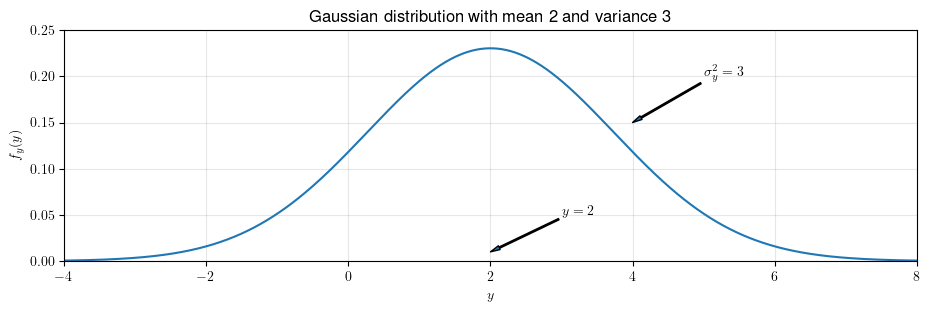

In [2]:
meany = 2
vary = 3

a = 1/np.sqrt(2*np.pi*vary)
y = np.arange(-4, 8, 0.01)
f = a*np.exp(-1/(2*vary)*(y-meany)**2)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(11,3));
plt.plot(y, f)
plt.title('Gaussian distribution with mean 2 and variance 3');
plt.xlabel('$y$')
plt.ylabel('$f_y(y)$')
plt.grid(visible = True, alpha =0.3);
plt.xlim([-4, 8])
plt.ylim([0, 0.25])
plt.annotate('$\sigma_y^2 = 3$',xy=(4,0.15),xytext=(5,0.2),arrowprops={"width":1,"headwidth":3,'headlength':7});
plt.annotate('$y = 2$',xy=(2,0.01),xytext=(3,0.05),arrowprops={"width":1,"headwidth":3,'headlength':7});


## two-dimensional Gaussian distribution

We start with a $p\times 1$ random
vector $x$ with mean $\bar{x}$ and nonsingular covariance matrix

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad R_x = E(x-\bar{x})(x-\bar{x})^{\sf T}>0 
$

We
say that $x$ has a Gaussian distribution if its pdf has the
form 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad {f_{x}(x)=\frac{1}{\sqrt{(2\pi)^{p}}}\;
\frac{1}{\sqrt{\det R_{x}}}\;\exp
{\left\{-\frac{1}{2}(x-\bar{x})^{\sf T} R_{x}^{-1}
(x-\bar{x})\right\}}\;} \label{3.b.1.eqxx}
$

in terms of the
determinant of $R_x$. Of course, when $p=1$, the above expression
reduces to the pdf considered earlier in
(4.4) with $R_x$ replaced by $\sigma_x^2$. Figure 4.2 illustrates the form of a two-dimensional Gaussian distribution with 

$
\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \quad \quad \bar{x}=\begin{bmatrix}1 \\
2
\end{bmatrix} , \qquad R_x = \begin{bmatrix}1 & 1\\
1 & 3
\end{bmatrix}
$

The individual entries of $x$ are denoted by $\{x_1,x_2\}$.


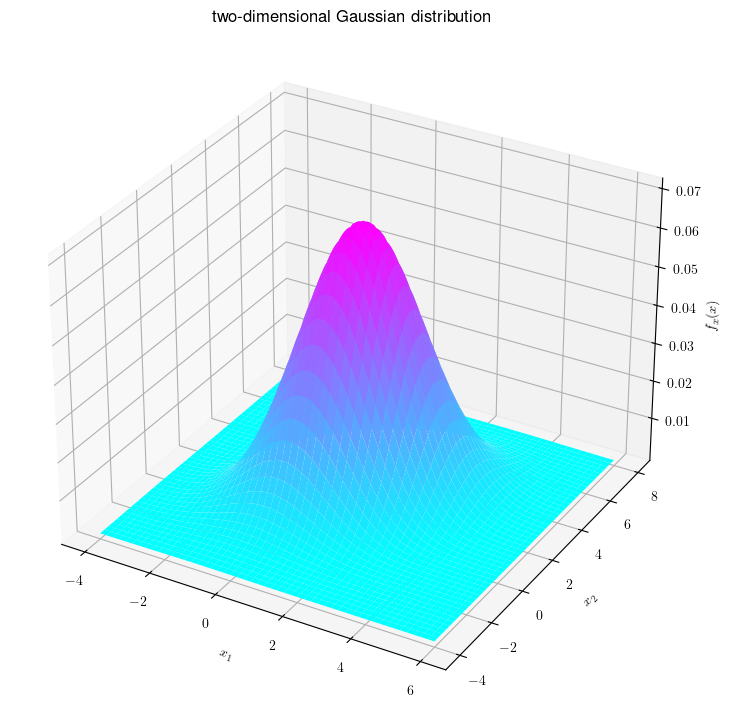

In [13]:
meanx = 1
varx = 2
meany = 2
vary = 3
sxy = 1
R = np.array([[varx, sxy],[sxy, vary]])
p=2
meanvec = np.array([meanx, meany])

x = np.arange(-4, 6, 0.01)
y = np.arange(-4, 8, 0.01)
X, Y = np.meshgrid(x,y)
pdf = np.zeros(X.shape)
a = 1/np.sqrt((2*np.pi)**p)
a = a/np.sqrt(np.linalg.det(R))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        xvec = np.array([X[i,j], Y[i,j]]);
        pdf[i,j] = a*np.exp(-0.5*np.dot(np.dot((xvec-meanvec),np.linalg.inv(R)),(xvec-meanvec)))

        

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

key = 132
plt.rcParams['figure.figsize']=20,10
fig = plt.figure(figsize=(30,10));
ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'cool')
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.set_title('two-dimensional Gaussian distribution')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
ax.set_zlabel('$f_x(x)$')
plt.show()


